In [26]:
# http://gluon.mxnet.io/chapter02_supervised-learning/perceptron.html

import mxnet as mx
import sys
from mxnet import nd, autograd
import matplotlib.pyplot as plt
import numpy as np
mx.random.seed(1)
print(sys.version)
print(mx.__version__)


3.6.4 (default, Mar  2 2018, 14:24:06) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
1.1.0



[[  4.88831490e-01  -1.40113938e+00]
 [  1.25149035e+00   2.19003558e+00]
 [ -2.44806454e-01  -1.85616887e+00]
 [  2.30656719e+00  -5.81444241e-04]
 [  1.13154978e-01   9.52830195e-01]
 [ -1.11239779e+00  -1.51664817e+00]
 [  2.99410880e-01  -1.38040769e+00]
 [ -1.32354295e+00   4.59043235e-01]
 [  1.04433037e-01  -1.03720903e+00]
 [ -1.98134053e-02   2.60558277e-01]
 [  1.47966158e+00   9.43218231e-01]
 [ -1.13733076e-01  -1.39950430e+00]
 [  2.05163598e+00  -4.38032269e-01]
 [ -1.36371326e+00   7.38085955e-02]
 [ -9.62422073e-01  -1.03730485e-01]
 [  1.26758382e-01  -9.50633645e-01]
 [ -9.76499677e-01  -7.27344453e-01]
 [ -1.23492301e+00   1.36450052e+00]
 [ -9.91710365e-01  -5.21567404e-01]
 [  4.45023119e-01  -1.14745629e+00]]
<NDArray 20x2 @cpu(0)>

[-1.  1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1.
 -1. -1.]
<NDArray 20 @cpu(0)>


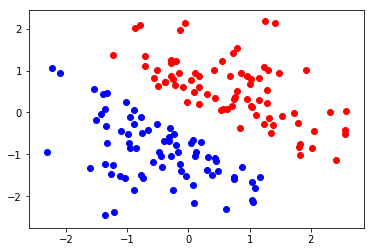

In [31]:
# generate fake data that is linearly separable with a margin epsilon given the data
def getfake(samples, dimensions, epsilon):
    wfake = nd.random_normal(shape=(dimensions))   # fake weight vector for separation
    bfake = nd.random_normal(shape=(1))            # fake bias
    wfake = wfake / nd.norm(wfake)                 # rescale to unit length

    # making some linearly separable data, simply by chosing the labels accordingly
    X = nd.zeros(shape=(samples, dimensions))
    Y = nd.zeros(shape=(samples))

    i = 0
    while (i < samples):
        tmp = nd.random_normal(shape=(1,dimensions))
        margin = nd.dot(tmp, wfake) + bfake
        if (nd.norm(tmp).asscalar() < 3) & (abs(margin.asscalar()) > epsilon):
#             print(X.shape)
#             print(tmp.shape)
            #X[i,:] = tmp 
            # jl fix
            X[i,:] = tmp[0]
            Y[i] = 1 if margin.asscalar() > 0 else -1
            i += 1
    return X, Y

# plot the data with colors chosen according to the labels
def plotdata(X,Y):
    for (x,y) in zip(X,Y):
        if (y.asscalar() == 1):
            plt.scatter(x[0].asscalar(), x[1].asscalar(), color='r')
        else:
            plt.scatter(x[0].asscalar(), x[1].asscalar(), color='b')

# plot contour plots on a [-3,3] x [-3,3] grid
def plotscore(w,d):
    xgrid = np.arange(-3, 3, 0.02)
    ygrid = np.arange(-3, 3, 0.02)
    xx, yy = np.meshgrid(xgrid, ygrid)
    zz = nd.zeros(shape=(xgrid.size, ygrid.size, 2))
    zz[:,:,0] = nd.array(xx)
    zz[:,:,1] = nd.array(yy)
    vv = nd.dot(zz,w) + d
    CS = plt.contour(xgrid,ygrid,vv.asnumpy())
    plt.clabel(CS, inline=1, fontsize=10)

X, Y = getfake(150, 2, 0.3)


print(X[0:20])
print(Y[0:20])
plotdata(X,Y)
plt.show()

Encountered an error and updated parameters
data   [ 0.48883149 -1.40113938], label -1.0
weight [-0.48883149  1.40113938], bias  -1.0


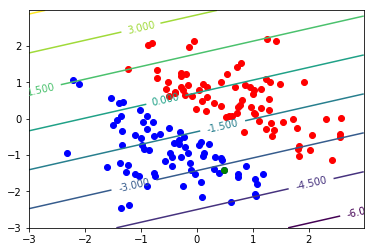

Encountered an error and updated parameters
data   [  2.30656719e+00  -5.81444241e-04], label 1.0
weight [ 1.81773567  1.40055788], bias  0.0


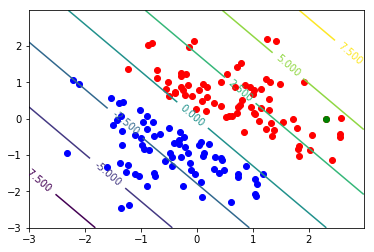

Encountered an error and updated parameters
data   [-1.23492301  1.36450052], label 1.0
weight [ 0.58281267  2.76505852], bias  1.0


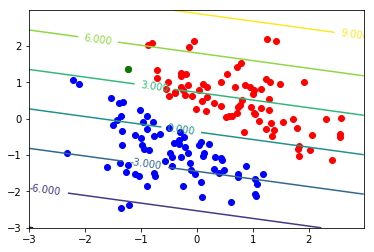

Encountered an error and updated parameters
data   [-1.01871097  0.24108347], label -1.0
weight [ 1.60152364  2.52397513], bias  0.0


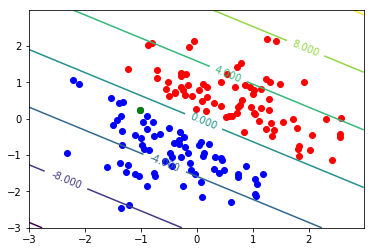

In [32]:
def perceptron(w,b,x,y):
    if (y * (nd.dot(w,x) + b)).asscalar() <= 0:
        w += y * x
        b += y
        return 1
    else:
        return 0

w = nd.zeros(shape=(2))
b = nd.zeros(shape=(1))
for (x,y) in zip(X,Y):
    res = perceptron(w,b,x,y)
    if (res == 1):
        print('Encountered an error and updated parameters')
        print('data   {}, label {}'.format(x.asnumpy(),y.asscalar()))
        print('weight {}, bias  {}'.format(w.asnumpy(),b.asscalar()))
        plotscore(w,b)
        plotdata(X,Y)
        plt.scatter(x[0].asscalar(), x[1].asscalar(), color='g')
        plt.show()